In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import AgglomerativeClustering

from fcmeans import FCM
from sklearn.datasets import make_blobs



import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Steel_industry_data.csv")

In [3]:
pd.reset_option('display.max_columns')
pd.reset_option('display.precision')

pd.set_option('display.max_columns',50)
pd.set_option('display.precision',1)

pd.reset_option('display.max_rows')
pd.reset_option('display.precision')

pd.set_option('display.max_rows',1000)
pd.set_option('display.precision',1)

In [4]:
df.head(200)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0    01/01/2018 00:15        3.2                                   3.0   
1    01/01/2018 00:30        4.0                                   4.5   
2    01/01/2018 00:45        3.2                                   3.3   
3    01/01/2018 01:00        3.3                                   3.6   
4    01/01/2018 01:15        3.8                                   4.5   
5    01/01/2018 01:30        3.3                                   3.6   
6    01/01/2018 01:45        3.6                                   4.1   
7    01/01/2018 02:00        3.6                                   4.3   
8    01/01/2018 02:15        3.3                                   3.6   
9    01/01/2018 02:30        3.8                                   4.7   
10   01/01/2018 02:45        3.5                                   4.0   
11   01/01/2018 03:00        3.2                                   3.6   
12   01/01/2018 03:15        4.0                                   5.0   
13   01/01/2018 03:30        3.3                                   3.7   
14   01/01/2018 03:45        3.3                                   3.9   
15   01/01/2018 04:00        3.9                                   5.0   
16   01/01/2018 04:15        3.3                                   3.8   
17   01/01/2018 04:30        3.6                                   4.3   
18   01/01/2018 04:45        3.7                                   4.5   
19   01/01/2018 05:00        3.3                                   3.6   
20   01/01/2018 05:15        3.6                                   4.1   
21   01/01/2018 05:30        3.6                                   4.1   
22   01/01/2018 05:45        3.3                                   3.5   
23   01/01/2018 06:00        3.8                                   4.3   
24   01/01/2018 06:15        3.4                                   3.6   
25   01/01/2018 06:30        3.2                                   3.4   
26   01/01/2018 06:45        3.9                                   4.5   
27   01/01/2018 07:00        3.3                                   3.5   
28   01/01/2018 07:15        3.3                                   3.5   
29   01/01/2018 07:30        3.9                                   4.8   
30   01/01/2018 07:45        3.2                                   3.6   
31   01/01/2018 08:00        3.3                                   3.8   
32   01/01/2018 08:15        3.8                                   4.8   
33   01/01/2018 08:30        3.3                                   3.7   
34   01/01/2018 08:45        3.5                                   4.5   
35   01/01/2018 09:00        3.9                                   0.0   
36   01/01/2018 09:15        3.6                                   0.0   
37   01/01/2018 09:30        4.0                                   0.0   
38   01/01/2018 09:45        3.9                                   0.0   
39   01/01/2018 10:00        3.6                                   0.0   
40   01/01/2018 10:15        4.1                                   0.0   
41   01/01/2018 10:30        3.7                                   0.0   
42   01/01/2018 10:45        3.6                                   0.0   
43   01/01/2018 11:00        4.2                                   0.0   
44   01/01/2018 11:15        3.5                                   0.0   
45   01/01/2018 11:30        3.5                                   0.0   
46   01/01/2018 11:45        4.0                                   0.0   
47   01/01/2018 12:00        3.5                                   0.0   
48   01/01/2018 12:15        3.6                                   0.0   
49   01/01/2018 12:30        4.2                                   0.0   
50   01/01/2018 12:45        3.7                                   0.0   
51   01/01/2018 13:00        3.7                                   0.0   
52   01/01/2018 13:15        4.2                                   0.0   
53   01/01/2018 13:30

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [6]:
df.describe().T

count     mean      std  min      25%  \
Usage_kWh                             35040.0  2.7e+01  3.3e+01  0.0      3.2   
Lagging_Current_Reactive.Power_kVarh  35040.0  1.3e+01  1.6e+01  0.0      2.3   
Leading_Current_Reactive_Power_kVarh  35040.0  3.9e+00  7.4e+00  0.0      0.0   
CO2(tCO2)                             35040.0  1.2e-02  1.6e-02  0.0      0.0   
Lagging_Current_Power_Factor          35040.0  8.1e+01  1.9e+01  0.0     63.3   
Leading_Current_Power_Factor          35040.0  8.4e+01  3.0e+01  0.0     99.7   
NSM                                   35040.0  4.3e+04  2.5e+04  0.0  21375.0   

                                          50%      75%      max  
Usage_kWh                                 4.6  5.1e+01  1.6e+02  
Lagging_Current_Reactive.Power_kVarh      5.0  2.3e+01  9.7e+01  
Leading_Current_Reactive_Power_kVarh      0.0  2.1e+00  2.8e+01  
CO2(tCO2)                                 0.0  2.0e-02  7.0e-02  
Lagging_Current_Power_Factor             88.0  9.9e+01  1.0e+02  
Leading_Current_Power_Factor            100.0  1.0e+02  1.0e+02  
NSM                                   42750.0  6.4e+04  8.6e+04

In [7]:
df.head(250)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0    01/01/2018 00:15        3.2                                   3.0   
1    01/01/2018 00:30        4.0                                   4.5   
2    01/01/2018 00:45        3.2                                   3.3   
3    01/01/2018 01:00        3.3                                   3.6   
4    01/01/2018 01:15        3.8                                   4.5   
5    01/01/2018 01:30        3.3                                   3.6   
6    01/01/2018 01:45        3.6                                   4.1   
7    01/01/2018 02:00        3.6                                   4.3   
8    01/01/2018 02:15        3.3                                   3.6   
9    01/01/2018 02:30        3.8                                   4.7   
10   01/01/2018 02:45        3.5                                   4.0   
11   01/01/2018 03:00        3.2                                   3.6   
12   01/01/2018 03:15        4.0                                   5.0   
13   01/01/2018 03:30        3.3                                   3.7   
14   01/01/2018 03:45        3.3                                   3.9   
15   01/01/2018 04:00        3.9                                   5.0   
16   01/01/2018 04:15        3.3                                   3.8   
17   01/01/2018 04:30        3.6                                   4.3   
18   01/01/2018 04:45        3.7                                   4.5   
19   01/01/2018 05:00        3.3                                   3.6   
20   01/01/2018 05:15        3.6                                   4.1   
21   01/01/2018 05:30        3.6                                   4.1   
22   01/01/2018 05:45        3.3                                   3.5   
23   01/01/2018 06:00        3.8                                   4.3   
24   01/01/2018 06:15        3.4                                   3.6   
25   01/01/2018 06:30        3.2                                   3.4   
26   01/01/2018 06:45        3.9                                   4.5   
27   01/01/2018 07:00        3.3                                   3.5   
28   01/01/2018 07:15        3.3                                   3.5   
29   01/01/2018 07:30        3.9                                   4.8   
30   01/01/2018 07:45        3.2                                   3.6   
31   01/01/2018 08:00        3.3                                   3.8   
32   01/01/2018 08:15        3.8                                   4.8   
33   01/01/2018 08:30        3.3                                   3.7   
34   01/01/2018 08:45        3.5                                   4.5   
35   01/01/2018 09:00        3.9                                   0.0   
36   01/01/2018 09:15        3.6                                   0.0   
37   01/01/2018 09:30        4.0                                   0.0   
38   01/01/2018 09:45        3.9                                   0.0   
39   01/01/2018 10:00        3.6                                   0.0   
40   01/01/2018 10:15        4.1                                   0.0   
41   01/01/2018 10:30        3.7                                   0.0   
42   01/01/2018 10:45        3.6                                   0.0   
43   01/01/2018 11:00        4.2                                   0.0   
44   01/01/2018 11:15        3.5                                   0.0   
45   01/01/2018 11:30        3.5                                   0.0   
46   01/01/2018 11:45        4.0                                   0.0   
47   01/01/2018 12:00        3.5                                   0.0   
48   01/01/2018 12:15        3.6                                   0.0   
49   01/01/2018 12:30        4.2                                   0.0   
50   01/01/2018 12:45        3.7                                   0.0   
51   01/01/2018 13:00        3.7                                   0.0   
52   01/01/2018 13:15        4.2                                   0.0   
53   01/01/2018 13:30

## EDA

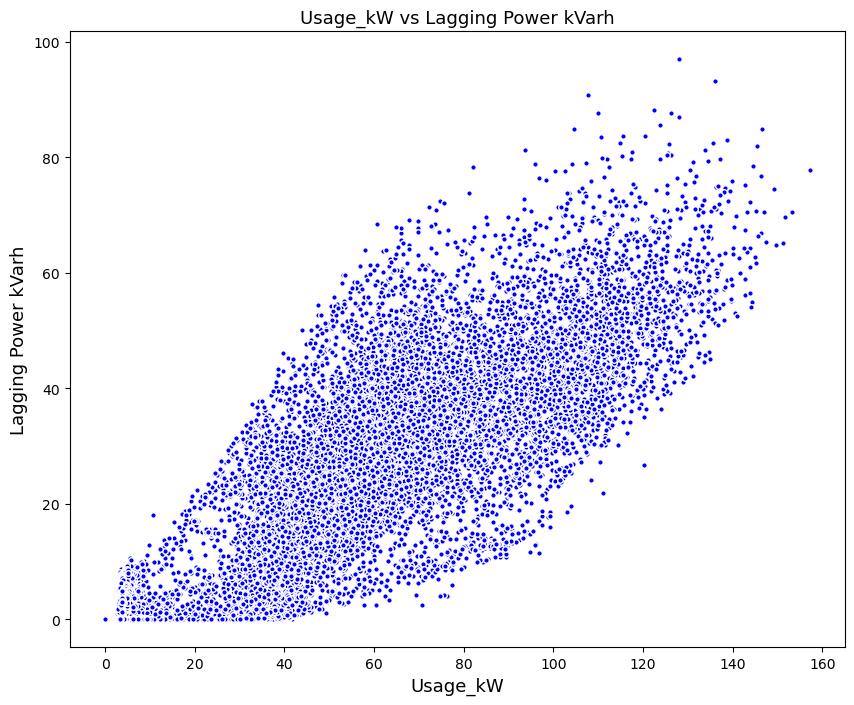

In [8]:
plt.figure(figsize=(10,8))
plt.plot(df['Usage_kWh'], df['Lagging_Current_Reactive.Power_kVarh'], color="blue", linestyle="none", marker="o", markeredgecolor="white",markersize=4)

plt.title("Usage_kW vs Lagging Power kVarh",fontsize=13)
plt.xlabel("Usage_kW",fontsize=13)
plt.ylabel("Lagging Power kVarh",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

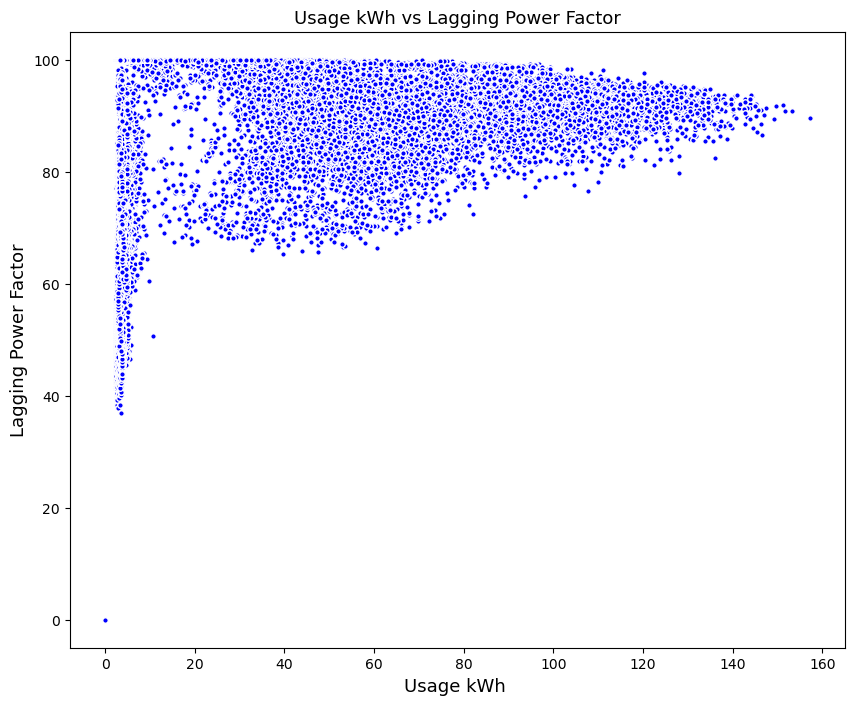

In [9]:
plt.figure(figsize=(10,8))
plt.plot(df['Usage_kWh'], df['Lagging_Current_Power_Factor'], color="blue", linestyle="none", marker="o", markeredgecolor="white",markersize=4)

plt.title("Usage kWh vs Lagging Power Factor",fontsize=13)
plt.xlabel("Usage kWh ",fontsize=13)
plt.ylabel("Lagging Power Factor",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

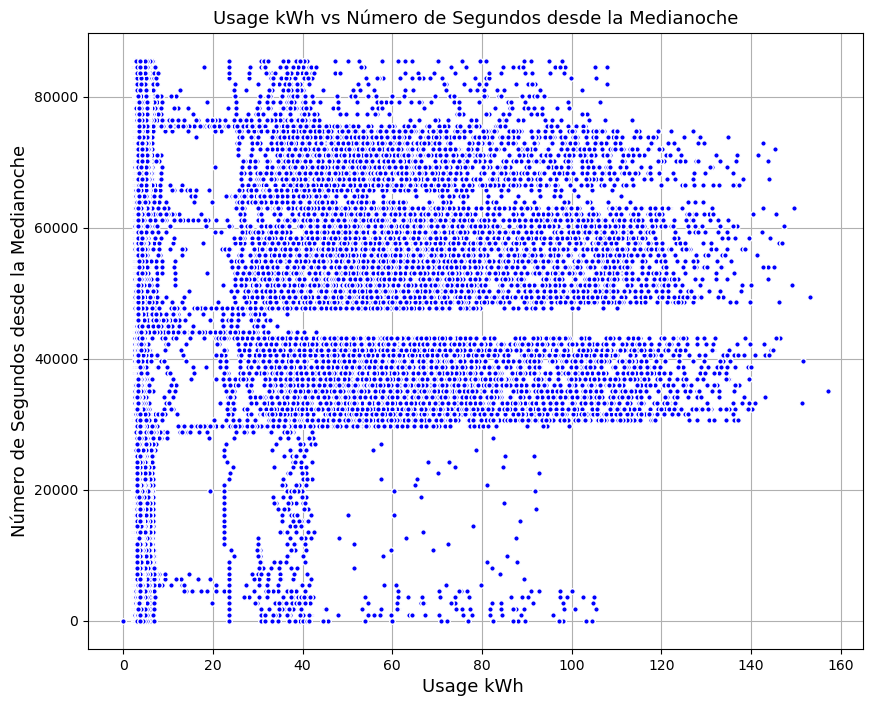

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df['Usage_kWh'], df['NSM'], color="blue", linestyle="none", marker="o", markeredgecolor="white", markersize=4)

plt.title("Usage kWh vs Número de Segundos desde la Medianoche",fontsize=13)
plt.xlabel("Usage kWh ",fontsize=13)
plt.ylabel("Número de Segundos desde la Medianoche",fontsize=13);
plt.grid(True)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

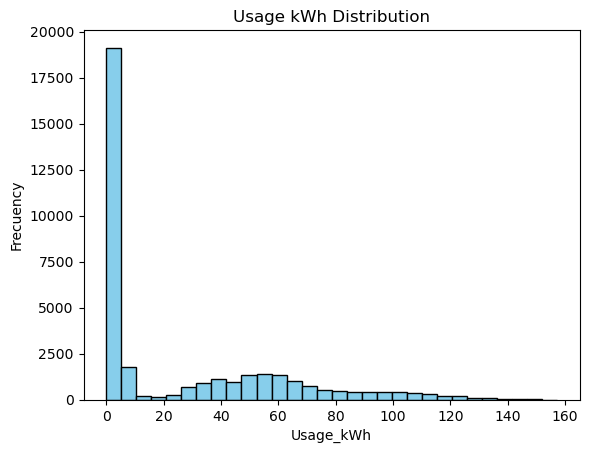

In [11]:
plt.hist(df['Usage_kWh'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Usage_kWh")
plt.ylabel("Frecuency")
plt.title("Usage kWh Distribution");

## Categorical Variables to Numeric

#### One-Hot (Get Dummies):

In [12]:
df = pd.get_dummies(df, columns=['WeekStatus'], prefix='WeekStatus')

#### Ordinal Codification:

Load Type

In [13]:
unique_Load = df['Load_Type'].unique()
unique_Load

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [14]:
loadtype= {'Light_Load': 1,'Medium_Load': 2,'Maximum_Load': 3}

In [15]:
df['Load_Type'] = df['Load_Type'].map(loadtype)

Day of the week

In [16]:
unique_days_of_week = df['Day_of_week'].unique()
unique_days_of_week

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [17]:
dayweek= {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}

In [18]:
df['Day_of_week'] = df['Day_of_week'].map(dayweek)

## Correlation

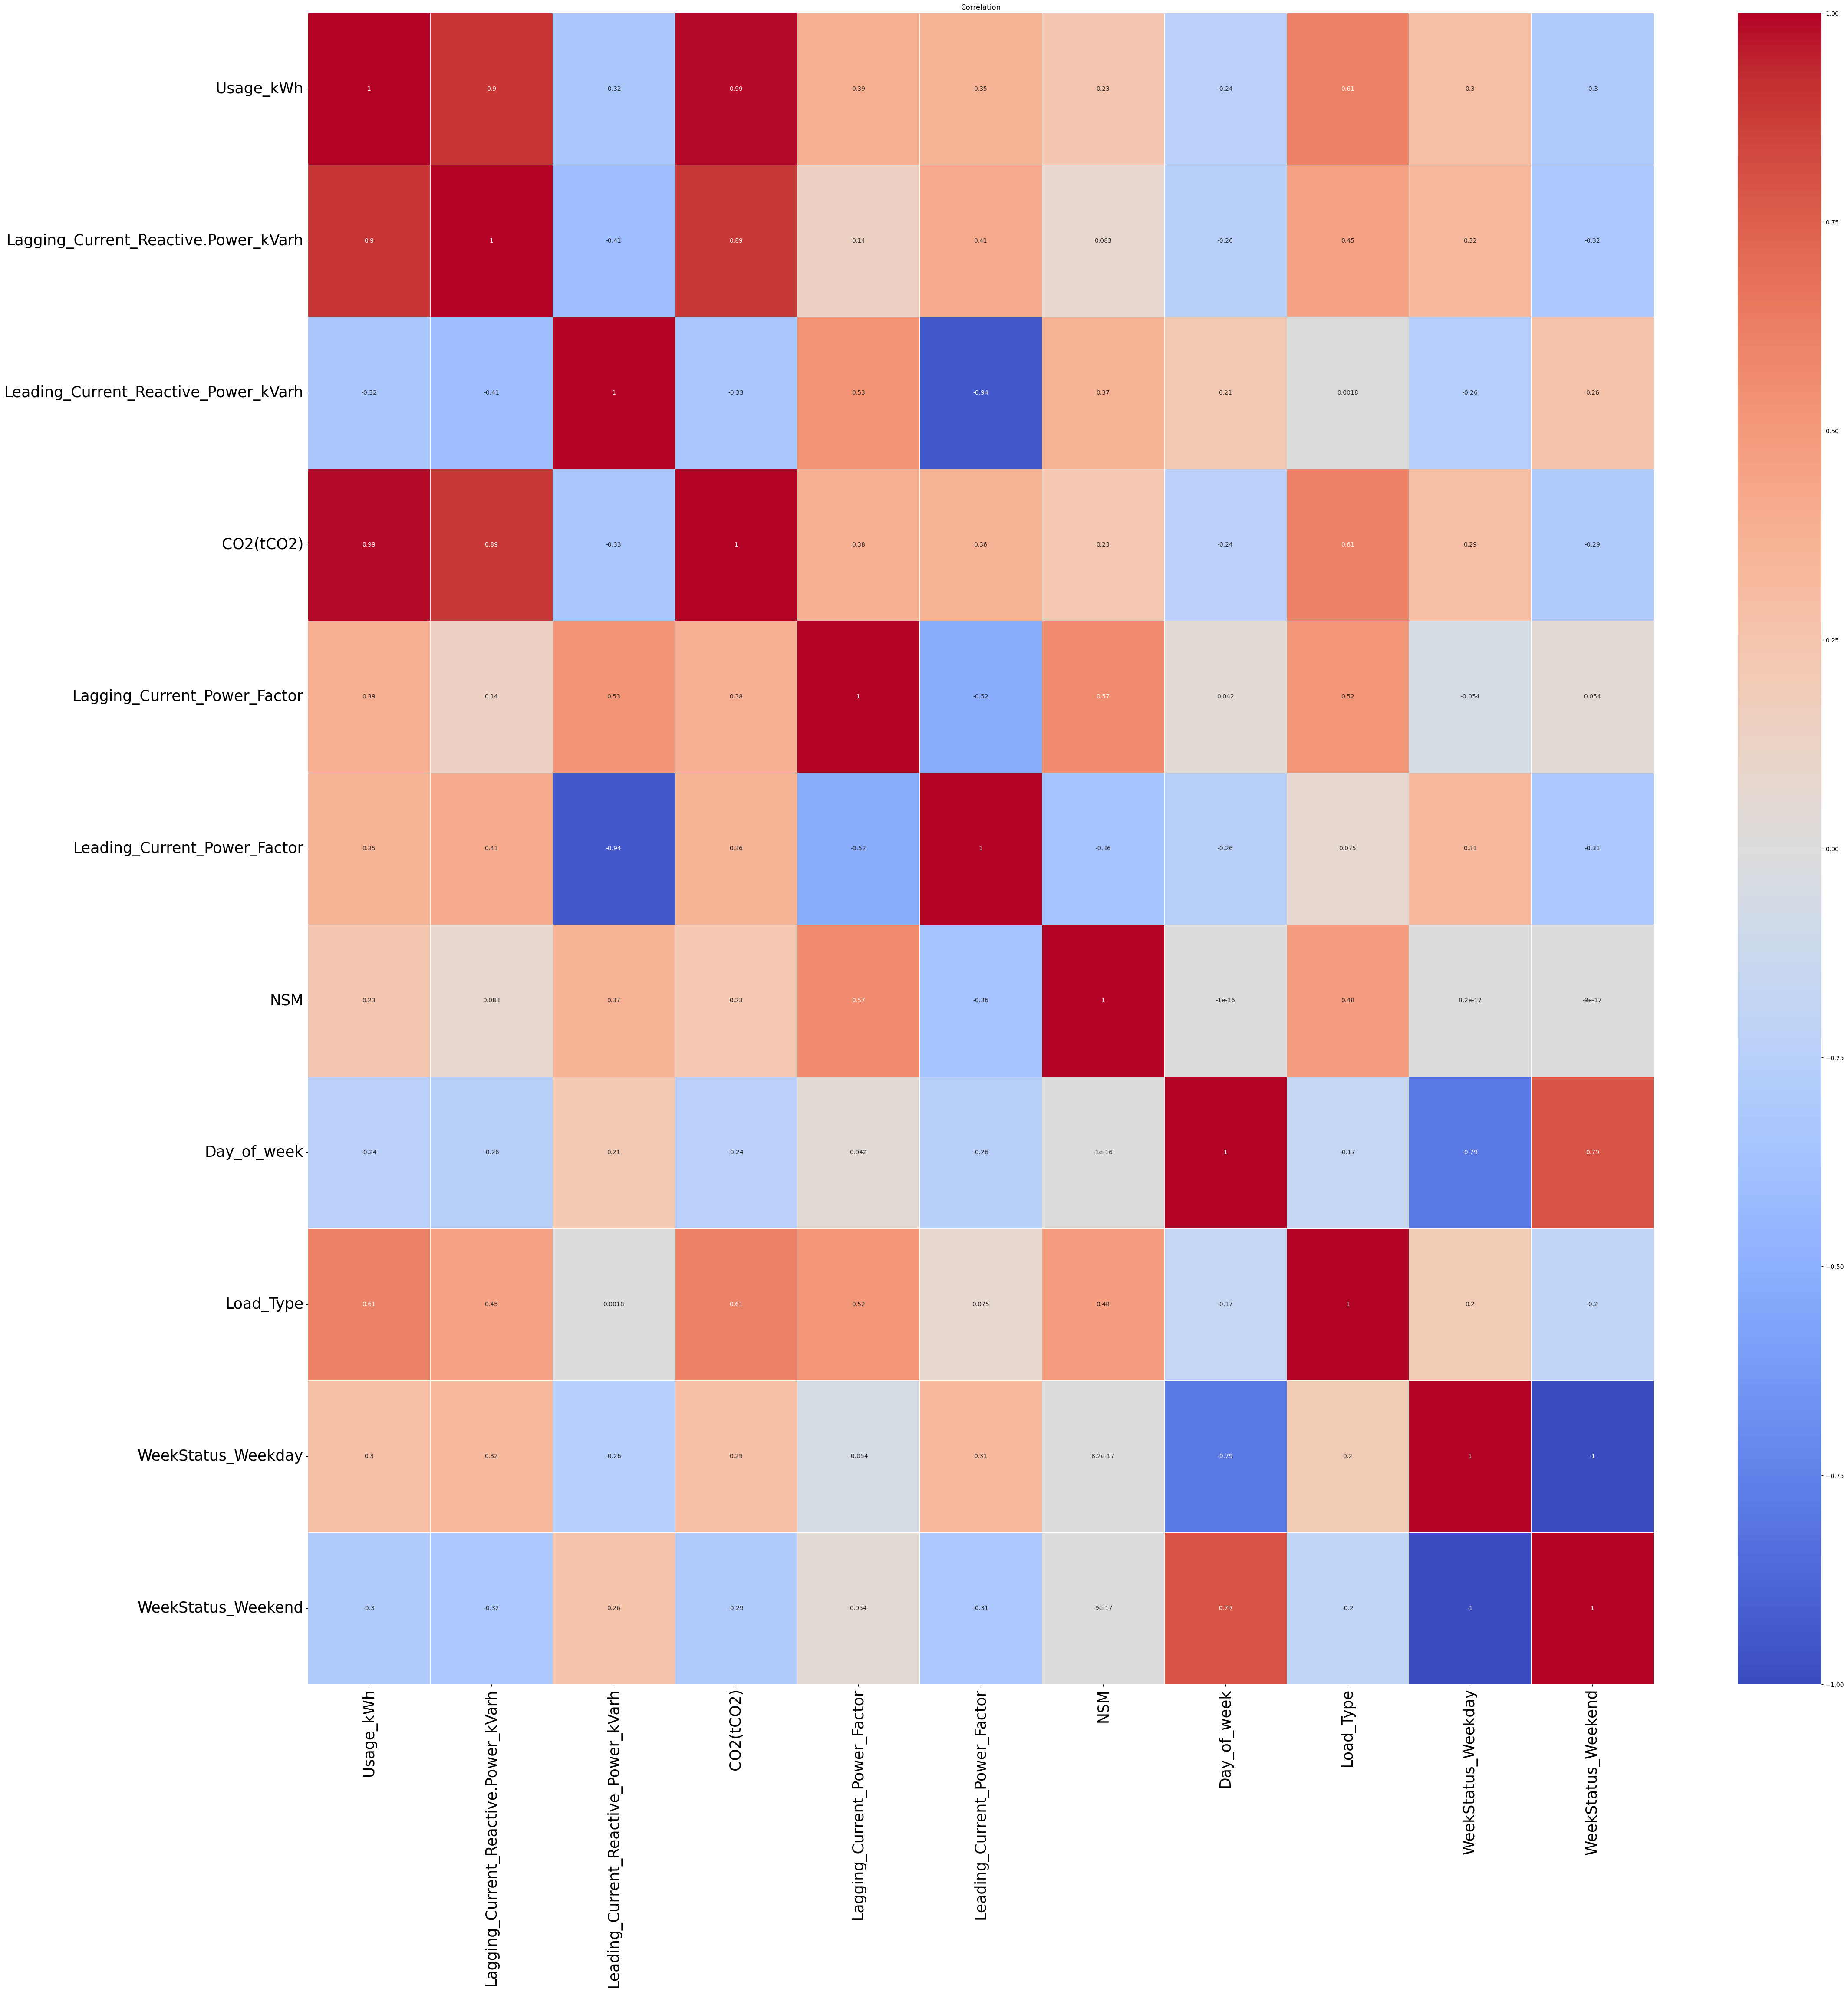

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation')
plt.yticks(rotation=0,fontsize=25)
plt.xticks(rotation=90,fontsize=25);


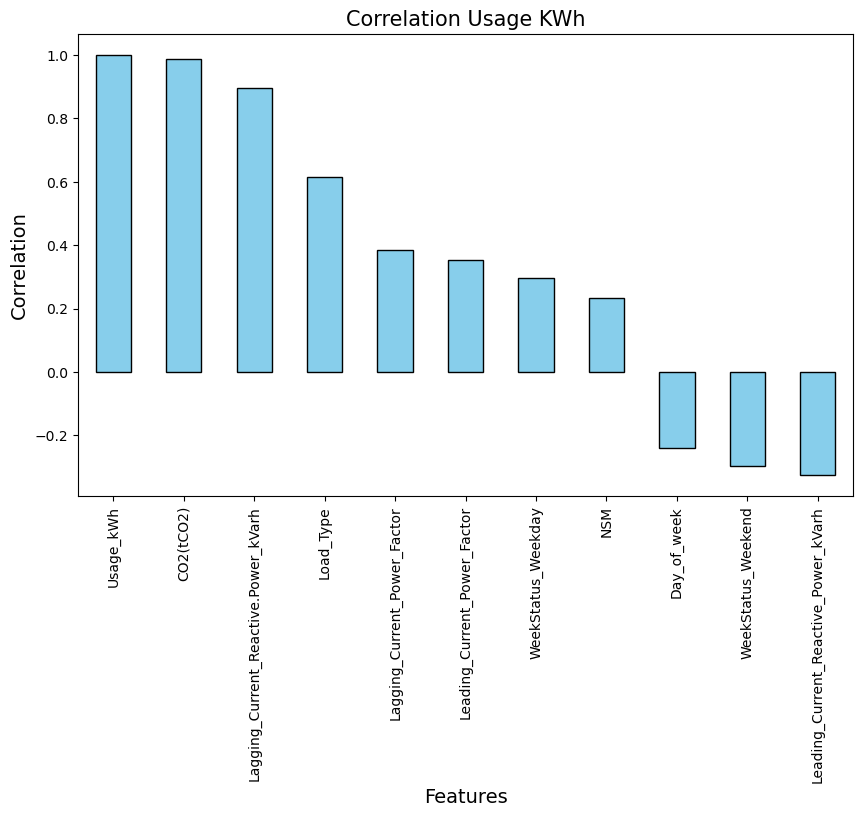

In [69]:
Usage_correlation= correlation_matrix['Usage_kWh'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
Usage_correlation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation Usage KWh',fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.show()

## Data Standardization: StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
df[['Usage_kWh_S','Lagging_Current_Reactive.Power_kVarh_S','Leading_Current_Reactive_Power_kVarh_S','CO2(tCO2)_S',
    'Lagging_Current_Power_Factor_S','Leading_Current_Power_Factor_S','NSM_S','Day_of_week_S','WeekStatus_Weekday_S',
    'WeekStatus_Weekend_S','Load_Type_S']]= scaler.fit_transform(df[[
    'Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)',
    'Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','Day_of_week','WeekStatus_Weekday',
    'WeekStatus_Weekend','Load_Type']])

In [23]:
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15        3.2                                   3.0   
1      01/01/2018 00:30        4.0                                   4.5   
2      01/01/2018 00:45        3.2                                   3.3   
3      01/01/2018 01:00        3.3                                   3.6   
4      01/01/2018 01:15        3.8                                   4.5   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00        3.9                                   4.9   
35036  31/12/2018 23:15        3.7                                   3.7   
35037  31/12/2018 23:30        3.8                                   3.2   
35038  31/12/2018 23:45        3.8                                   3.1   
35039  31/12/2018 00:00        3.7                                   3.0   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0e+00        0.0   
1                                   0.0e+00        0.0   
2                                   0.0e+00        0.0   
3                                   0.0e+00        0.0   
4                                   0.0e+00        0.0   
...                                     ...        ...   
35035                               0.0e+00        0.0   
35036                               0.0e+00        0.0   
35037                               7.0e-02        0.0   
35038                               1.1e-01        0.0   
35039                               7.0e-02        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                              73.2                         100.0    900   
1                              66.8                         100.0   1800   
2                              70.3                         100.0   2700   
3                              68.1                         100.0   3600   
4                              64.7                         100.0   4500   
...                             ...                           ...    ...   
35035                          62.1                         100.0  82800   
35036                          70.7                         100.0  83700   
35037                          76.6                         100.0  84600   
35038                          77.7                         100.0  85500   
35039                          77.2                         100.0      0   

       Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  \
0                1          1                   1                   0   
1                1          1                   1                   0   
2                1          1                   1                   0   
3                1          1                   1                   0   
4                1          1                   1                   0   
...            ...        ...                 ...                 ...   
35035            1          1                   1                   0   
35036            1          1                   1                   0   
35037            1          1                   1                   0   
35038            1          1                   1                   0   
35039            1          1                   1                   0   

       Usage_kWh_S  Lagging_Current_Reactive.Power_kVarh_S  \
0             -0.7                                    -0.6   
1             -0.7                                    -0.5   
2             -0.7                                    -0.6   
3             -0.7                                    -0.6   
4             -0.7                                    -0.5   
...            ...                                     ...   
35035         -0.7                                    -0.5   
35036         -0.7                                    -0.6   
35037         -0.7                                    -0.6   

In [24]:
df=df.drop('date', axis=1)

## K-MEANS Clustering

### Elbow method

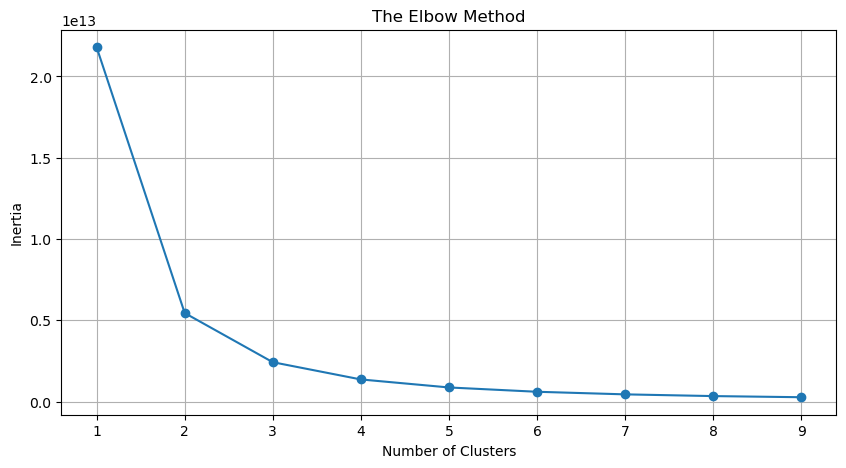

In [25]:
def optimise_k_means(df, max_k):
    means = []
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertia.append(kmeans.inertia_)

    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.plot(means, inertia, 'o-')

    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    
optimise_k_means(df, max_k=10)

## Applying K-means clustering


In [26]:
# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

In [27]:
data = df[['Usage_kWh_S', 'Lagging_Current_Reactive.Power_kVarh_S']].values

y_kmeans = kmeans.fit(data)

In [28]:
df['kmeans_3']=kmeans.labels_

In [29]:
df.head(200)

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0          3.2                                   3.0   
1          4.0                                   4.5   
2          3.2                                   3.3   
3          3.3                                   3.6   
4          3.8                                   4.5   
5          3.3                                   3.6   
6          3.6                                   4.1   
7          3.6                                   4.3   
8          3.3                                   3.6   
9          3.8                                   4.7   
10         3.5                                   4.0   
11         3.2                                   3.6   
12         4.0                                   5.0   
13         3.3                                   3.7   
14         3.3                                   3.9   
15         3.9                                   5.0   
16         3.3                                   3.8   
17         3.6                                   4.3   
18         3.7                                   4.5   
19         3.3                                   3.6   
20         3.6                                   4.1   
21         3.6                                   4.1   
22         3.3                                   3.5   
23         3.8                                   4.3   
24         3.4                                   3.6   
25         3.2                                   3.4   
26         3.9                                   4.5   
27         3.3                                   3.5   
28         3.3                                   3.5   
29         3.9                                   4.8   
30         3.2                                   3.6   
31         3.3                                   3.8   
32         3.8                                   4.8   
33         3.3                                   3.7   
34         3.5                                   4.5   
35         3.9                                   0.0   
36         3.6                                   0.0   
37         4.0                                   0.0   
38         3.9                                   0.0   
39         3.6                                   0.0   
40         4.1                                   0.0   
41         3.7                                   0.0   
42         3.6                                   0.0   
43         4.2                                   0.0   
44         3.5                                   0.0   
45         3.5                                   0.0   
46         4.0                                   0.0   
47         3.5                                   0.0   
48         3.6                                   0.0   
49         4.2                                   0.0   
50         3.7                                   0.0   
51         3.7                                   0.0   
52         4.2                                   0.0   
53         3.6                                   0.0   
54         3.7                                   0.0   
55         4.3                                   0.0   
56         3.6                                   0.0   
57         3.8                                   0.0   
58         4.1                                   0.0   
59         3.6                                   0.0   
60         3.9                                   0.0   
61         4.1                                   0.0   
62         3.6                                   0.0   
63         4.0                                   0.0   
64         4.0                                   0.0   
65         3.6                                   0.0   
66         4.1                                   0.0   
67         3.8                                   0.0   
68         3.6                                   0.0   
69         4.1                                   0.0   
70         3.6               

## Plotting the Results

In [30]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.62765475, -0.60871934],
       [ 1.99624044,  2.12220746],
       [ 0.84630375,  0.72433091]])

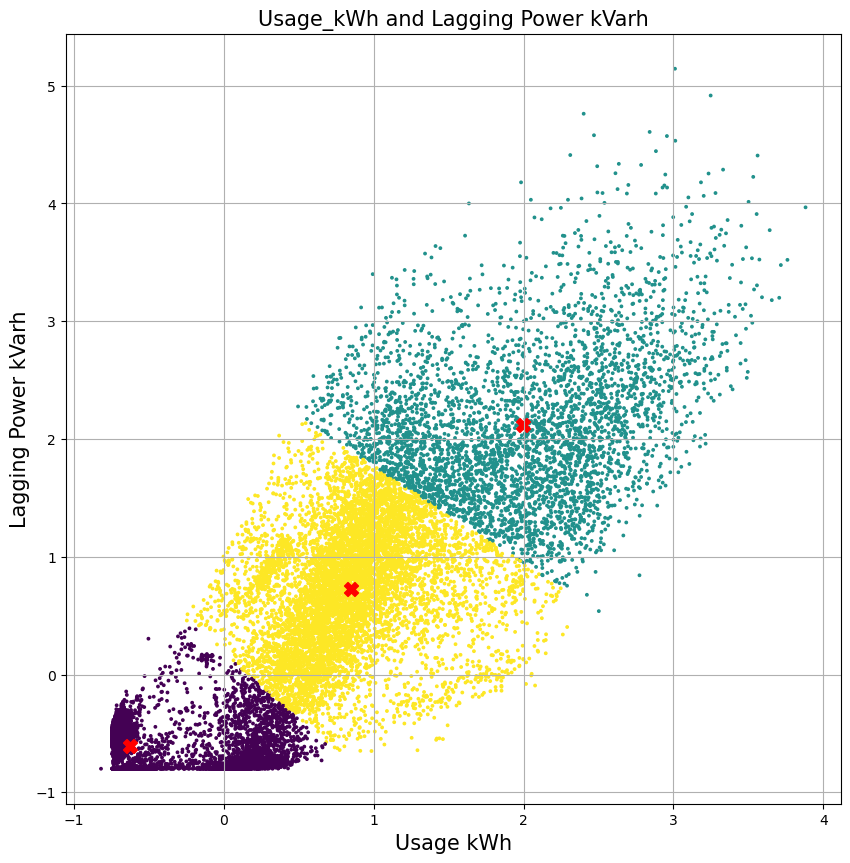

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=df['Usage_kWh_S'], y= df['Lagging_Current_Reactive.Power_kVarh_S'], c=df['kmeans_3'],s=3);
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=100, label='Centroids')


plt.title("Usage_kWh and Lagging Power kVarh",fontsize=15)
plt.xlabel('Usage kWh',fontsize=15)
plt.ylabel('Lagging Power kVarh',fontsize=15)

plt.grid(True)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

## Creating multiple clusters

In [32]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Usage_kWh_S','Lagging_Current_Reactive.Power_kVarh_S']])
    df[f'KMeans_{k}']=kmeans.labels_

In [33]:
df

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0            3.2                                   3.0   
1            4.0                                   4.5   
2            3.2                                   3.3   
3            3.3                                   3.6   
4            3.8                                   4.5   
...          ...                                   ...   
35035        3.9                                   4.9   
35036        3.7                                   3.7   
35037        3.8                                   3.2   
35038        3.8                                   3.1   
35039        3.7                                   3.0   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0e+00        0.0   
1                                   0.0e+00        0.0   
2                                   0.0e+00        0.0   
3                                   0.0e+00        0.0   
4                                   0.0e+00        0.0   
...                                     ...        ...   
35035                               0.0e+00        0.0   
35036                               0.0e+00        0.0   
35037                               7.0e-02        0.0   
35038                               1.1e-01        0.0   
35039                               7.0e-02        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                              73.2                         100.0    900   
1                              66.8                         100.0   1800   
2                              70.3                         100.0   2700   
3                              68.1                         100.0   3600   
4                              64.7                         100.0   4500   
...                             ...                           ...    ...   
35035                          62.1                         100.0  82800   
35036                          70.7                         100.0  83700   
35037                          76.6                         100.0  84600   
35038                          77.7                         100.0  85500   
35039                          77.2                         100.0      0   

       Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  \
0                1          1                   1                   0   
1                1          1                   1                   0   
2                1          1                   1                   0   
3                1          1                   1                   0   
4                1          1                   1                   0   
...            ...        ...                 ...                 ...   
35035            1          1                   1                   0   
35036            1          1                   1                   0   
35037            1          1                   1                   0   
35038            1          1                   1                   0   
35039            1          1                   1                   0   

       Usage_kWh_S  Lagging_Current_Reactive.Power_kVarh_S  \
0             -0.7                                    -0.6   
1             -0.7                                    -0.5   
2             -0.7                                    -0.6   
3             -0.7                                    -0.6   
4             -0.7                                    -0.5   
...            ...                                     ...   
35035         -0.7                                    -0.5   
35036         -0.7                                    -0.6   
35037         -0.7                                    -0.6   
35038         -0.7                                    -0.6   
35039         -0.7                                    -0.6   

       Leading_Current_Reactive_Power_kVarh_S  CO2(tCO2)_S  \
0               

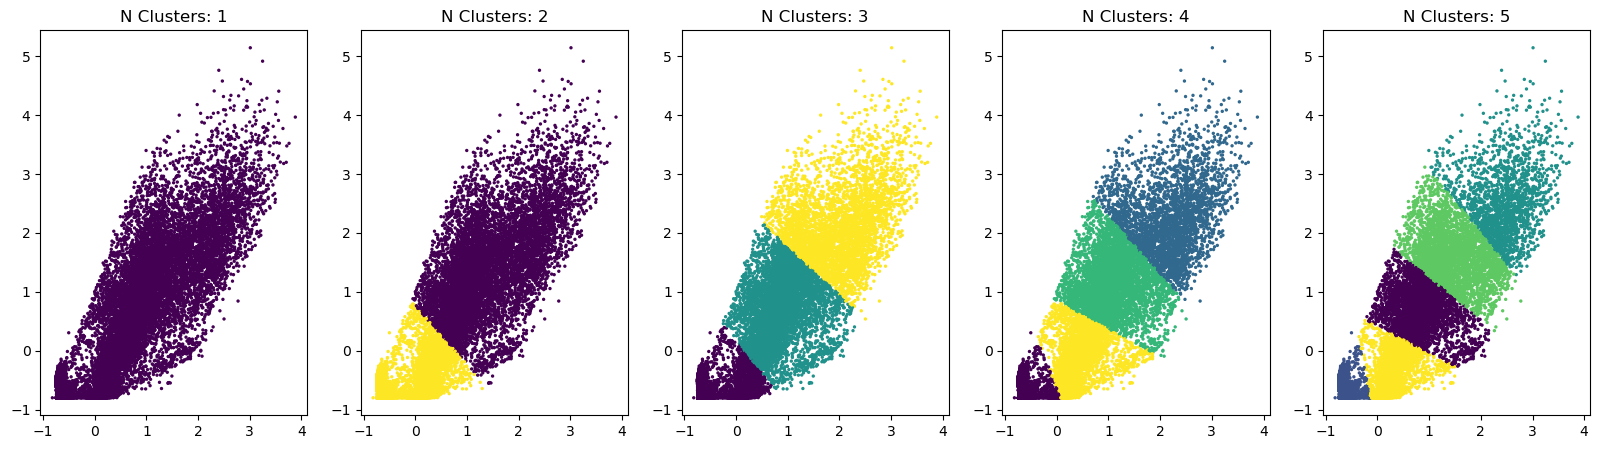

In [34]:
fig, axs=plt.subplots(nrows=1,ncols=5, figsize=(20,5))

for i, ax in enumerate (fig.axes, start=1):
    ax.scatter(x=df['Usage_kWh_S'], y= df['Lagging_Current_Reactive.Power_kVarh_S'], c=df[f'KMeans_{i}'],s=2)
    ax.set_title(f'N Clusters: {i}')

### K-Medoids- Day Analysis

#### Monday

In [35]:
df_monday= df[df['Day_of_week'] == 1]

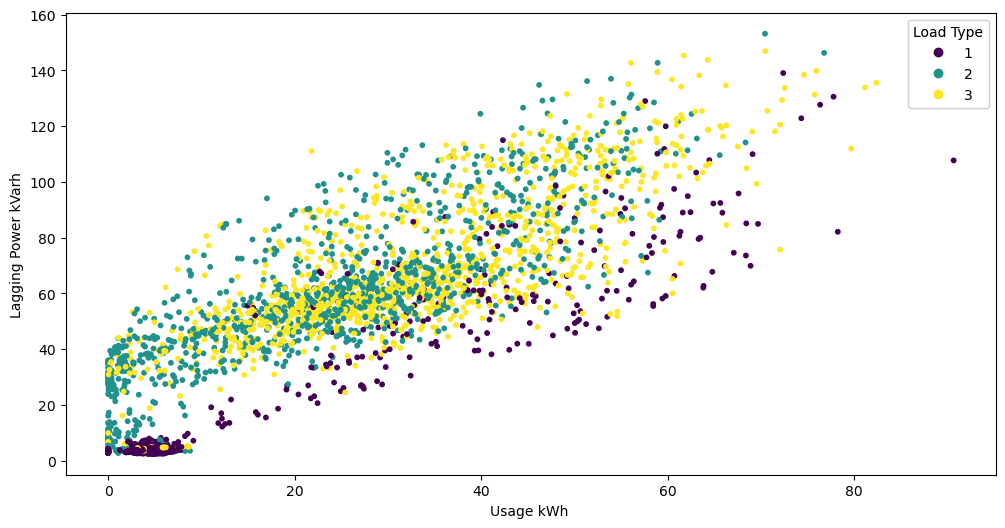

In [82]:
# Create objects as X and y
X = df_monday[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh']].to_numpy() 
y = df_monday['Load_Type']

# Visualizing data
fig, axes = plt.subplots(figsize=(12, 6), dpi=100)

# Scatter plot for 'Usage_kWh_S' and 'Lagging_Current_Reactive.Power_kVarh_S'
scatter = axes.scatter(X[:, 1],X[:, 0], c=y, cmap='viridis',s=10)
axes.set_xlabel('Usage kWh ')
axes.set_ylabel('Lagging Power kVarh')

# Agregar una leyenda para los colores
legend1 = axes.legend(*scatter.legend_elements(), title="Load Type")
axes.add_artist(legend1)


In [75]:
# Initialise the number of clusters
cluster_num = 3

# model = k_medoids(k=cluster_num)
model   = KMedoids(n_clusters = 3, random_state = 0)
centers = model.fit(X)

# Display the centers
print(centers)

KMedoids(n_clusters=3, random_state=0)


Text(0.5, 1.0, 'Predicted')

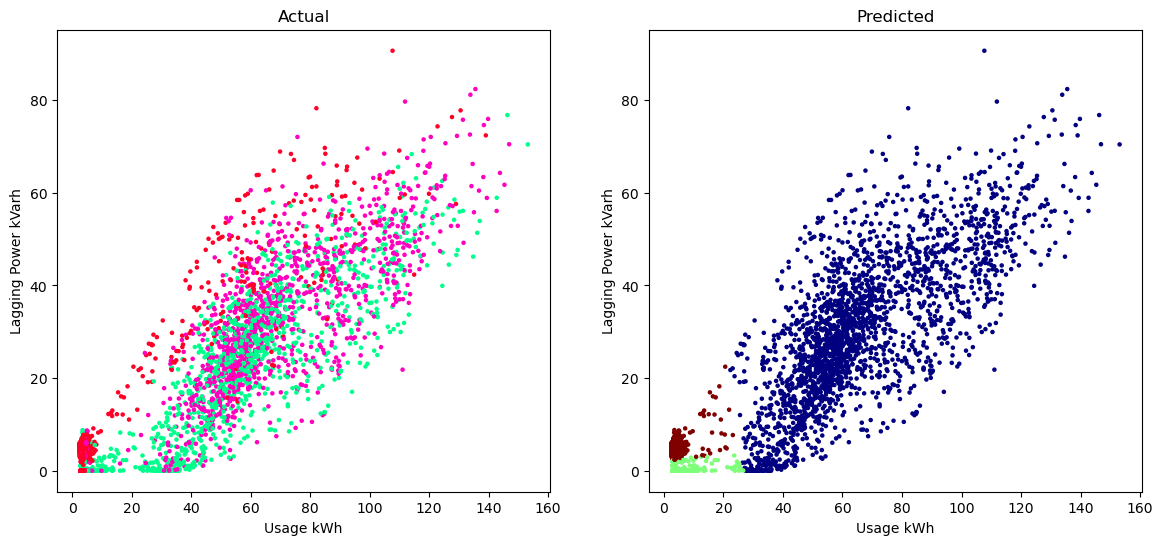

In [83]:
new_labels = model.predict(X)
# Plot the identified clusters 
fig, axes = plt.subplots(1, 2, figsize = (14, 6), dpi = 100) 
axes[0].scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow', s=5)
axes[1].scatter(X[:, 0], X[:, 1], c = new_labels, cmap = 'jet',s=5)
axes[0].set_xlabel('Usage kWh')
axes[0].set_ylabel('Lagging Power kVarh')
axes[1].set_xlabel('Usage kWh')
axes[1].set_ylabel('Lagging Power kVarh')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

#### Saturday

In [39]:
df_saturday= df[df['Day_of_week'] == 6]

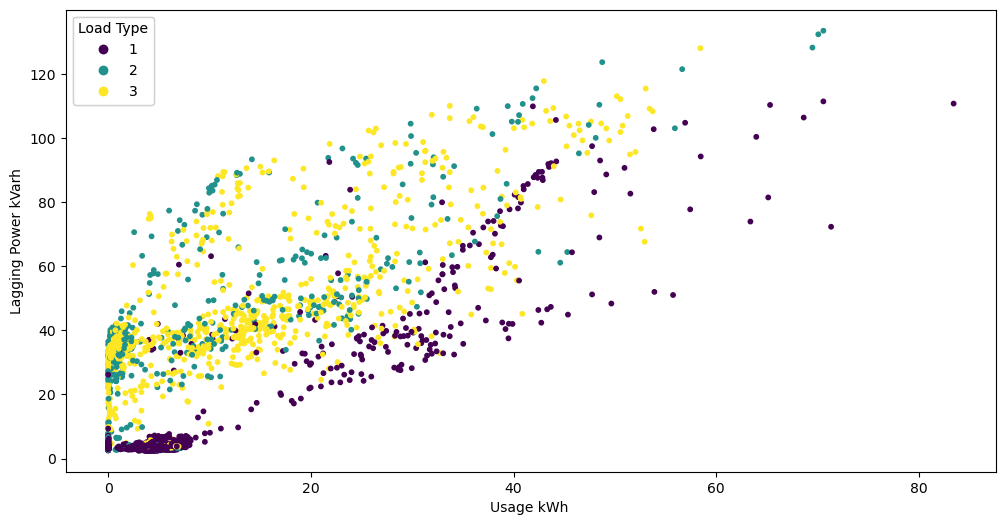

In [81]:
# Create objects as X and y
X= df_saturday[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh']].to_numpy() 
y = df_saturday['Load_Type']

# Visualizing data
fig, axes = plt.subplots(figsize=(12, 6), dpi=100)

# Scatter plot for 'Usage_kWh_S' and 'Lagging_Current_Reactive.Power_kVarh_S'
scatter = axes.scatter(X[:, 1],X[:, 0], c=y, cmap='viridis', s=10)
axes.set_xlabel('Usage kWh ')
axes.set_ylabel('Lagging Power kVarh')

# Agregar una leyenda para los colores
legend1 = axes.legend(*scatter.legend_elements(), title="Load Type")
axes.add_artist(legend1)


In [41]:
# Initialise the number of clusters
cluster_num = 3

# model = k_medoids(k=cluster_num)
model   = KMedoids(n_clusters = 3, random_state = 0)
centers = model.fit(X)

# Display the centers
print(centers)

KMedoids(n_clusters=3, random_state=0)


Text(0.5, 1.0, 'Predicted')

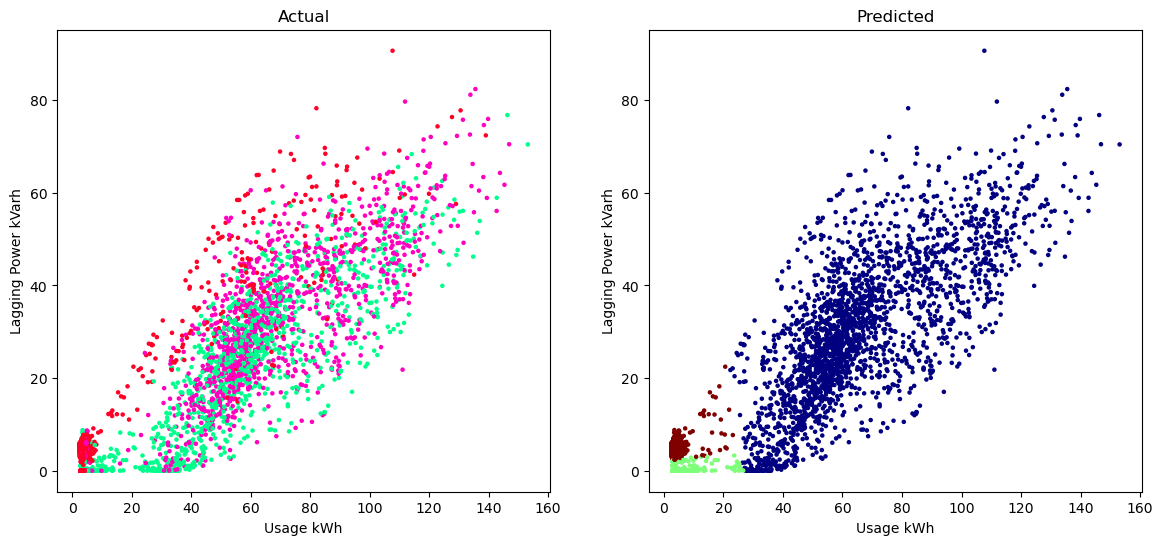

In [84]:
new_labels = model.predict(X)
# Plot the identified clusters 
fig, axes = plt.subplots(1, 2, figsize = (14,6), dpi = 100) 
axes[0].scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow',  s=5)
axes[1].scatter(X[:, 0], X[:, 1], c = new_labels, cmap = 'jet', s=5)
axes[0].set_xlabel('Usage kWh')
axes[0].set_ylabel('Lagging Power kVarh')
axes[1].set_xlabel('Usage kWh')
axes[1].set_ylabel('Lagging Power kVarh')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

## DBSCAN

In [43]:
X_DBSCAN = df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh']].values

In [44]:
X_DBSCAN

array([[3.17, 2.95],
       [4.  , 4.46],
       [3.24, 3.28],
       ...,
       [3.78, 3.17],
       [3.78, 3.06],
       [3.67, 3.02]])

In [45]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan.fit(X_DBSCAN)

DBSCAN()

In [46]:
df['DBSCAN_label']=dbscan.labels_

In [47]:
cluster_labels = dbscan.labels_
num_noise_points = np.sum(cluster_labels == -1)
num_noise_points

5586

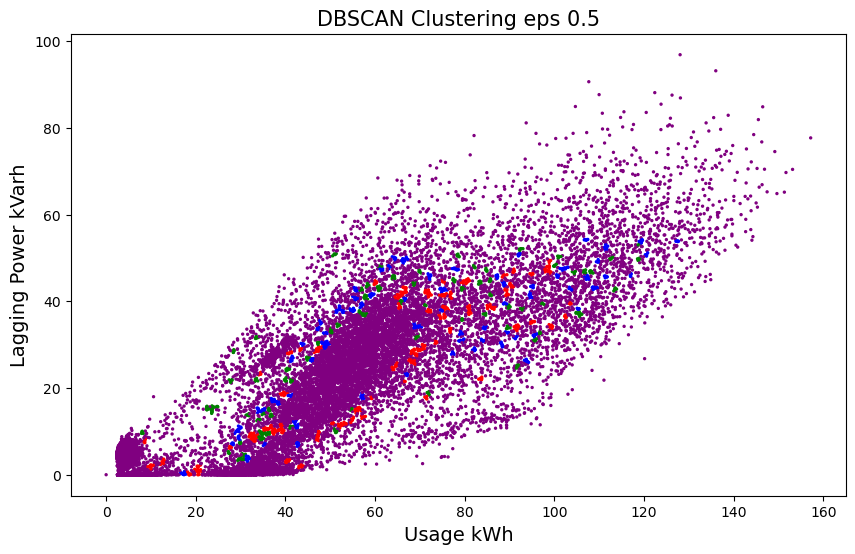

In [48]:
colors = ['purple','red','blue','green']

plt.figure(figsize=(10, 6))
plt.scatter(X_DBSCAN[:, 0], X_DBSCAN[:, 1], c=df['DBSCAN_label'], cmap=matplotlib.colors.ListedColormap(colors), s=2)

plt.title('DBSCAN Clustering eps 0.5', fontsize=15)
plt.xlabel('Usage kWh', fontsize = 14)
plt.ylabel('Lagging Power kVarh', fontsize = 14)
plt.show()

### DBSCAN Parameter Estimation - K distance graph

"The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost." Mullin, T. (2020). 

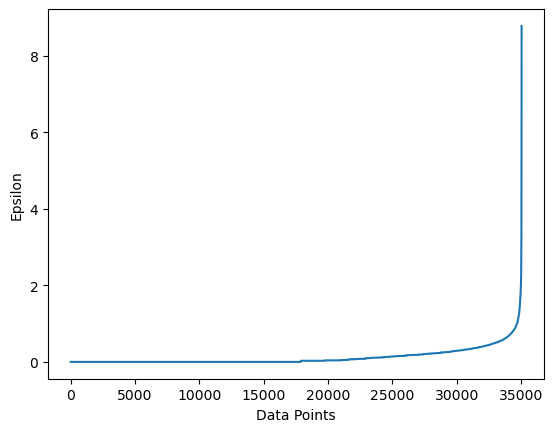

In [131]:
neigh = NearestNeighbors(n_neighbors=2)
neigh_fit = neigh.fit(X_DBSCAN)
distances, indices = neigh_fit.kneighbors(X_DBSCAN)

# Ordena las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Tomar la segunda columna

# Plotea el K-distance graph
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

### Second K distance graph

In [135]:
# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(X_DBSCAN)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(X_DBSCAN)

print(distances, indices)

[[0.   0.  ]
 [0.   0.03]
 [0.   0.  ]
 ...
 [0.   0.03]
 [0.   0.  ]
 [0.   0.  ]] [[ 6645     0]
 [    1 32643]
 [  596     2]
 ...
 [35037  5378]
 [32850  5404]
 [ 4028 34565]]


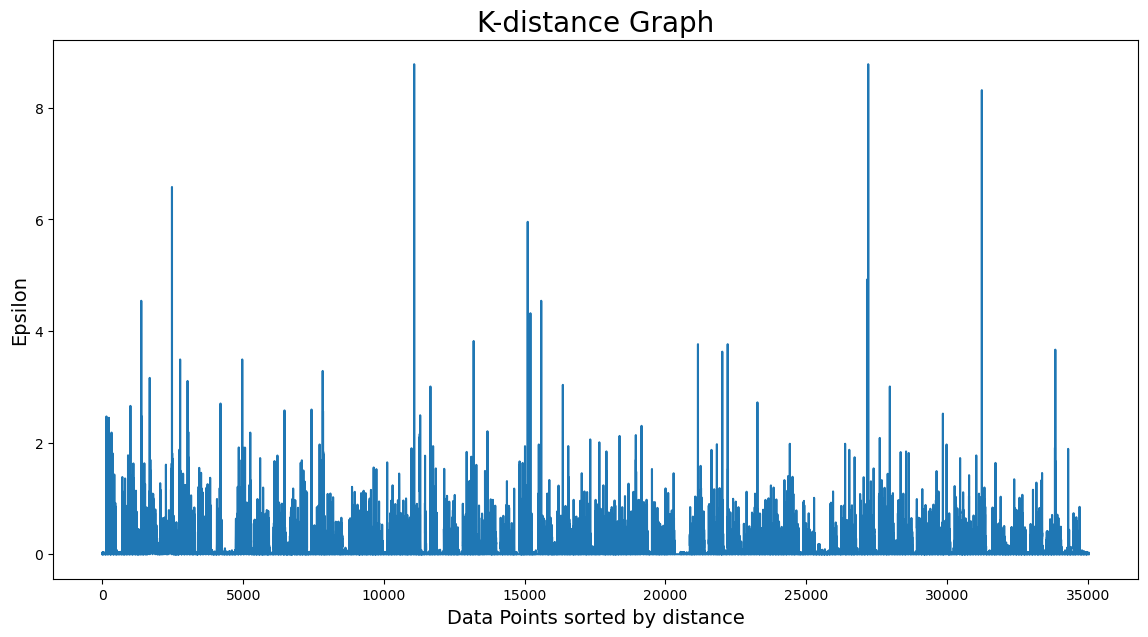

In [136]:
# Plotting K-distance Graph
#distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [154]:
dbscan = DBSCAN(eps=1, min_samples=1) 
dbscan.fit(X_DBSCAN)

DBSCAN(eps=1, min_samples=1)

In [155]:
df['DBSCAN_label_2']=dbscan.labels_

In [156]:
cluster_labels = dbscan.labels_
num_noise_points = np.sum(cluster_labels == -1)
num_noise_points

0

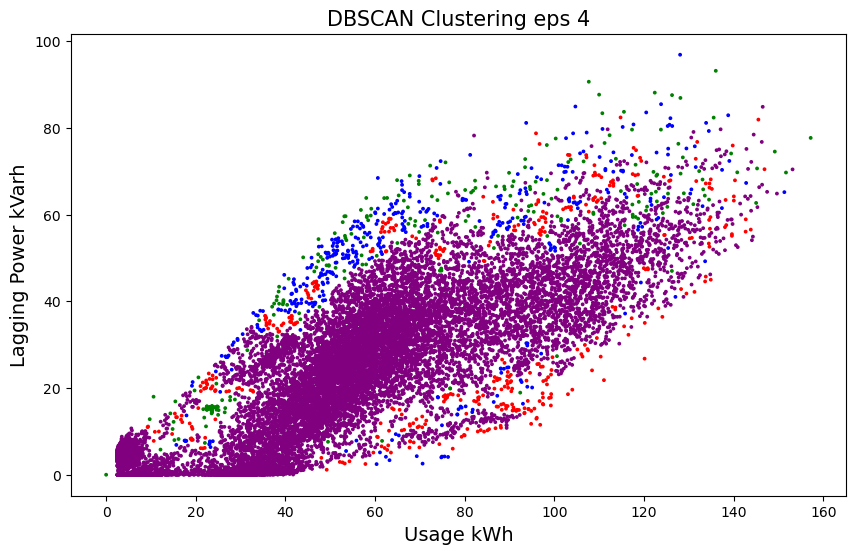

In [157]:
colors = ['purple','red','blue','green']

plt.figure(figsize=(10, 6))
plt.scatter(X_DBSCAN[:, 0], X_DBSCAN[:, 1], c=df['DBSCAN_label_2'], cmap=matplotlib.colors.ListedColormap(colors), s=3)

plt.title('DBSCAN Clustering eps 4', fontsize=15)
plt.xlabel('Usage kWh', fontsize = 14)
plt.ylabel('Lagging Power kVarh', fontsize = 14)

plt.show()

It is clear that DBSCAN creates clusters based on varying densities, it struggles with clusters of similar densities. Also, as the dimension of data increases, it becomes difficult for DBSCAN to create clusters and it falls prey to the Curse of Dimensionality.

## Hierarchical Clustering - Agglomerative Clustering

In [62]:
X_HC=df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh']].values

In [63]:
# Create an object model
model_HC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean')

# Train the model by calling fit() method
model_HC.fit(X_HC)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [64]:
# Add another column into the dataframe (df)
df['HR_labels'] = model_HC.labels_

# Display the dataframe records
df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0        3.2                                   3.0   
1        4.0                                   4.5   
2        3.2                                   3.3   
3        3.3                                   3.6   
4        3.8                                   4.5   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                          73.2                         100.0   900   
1                          66.8                         100.0  1800   
2                          70.3                         100.0  2700   
3                          68.1                         100.0  3600   
4                          64.7                         100.0  4500   

   Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  \
0            1          1                   1                   0   
1            1          1                   1                   0   
2            1          1                   1                   0   
3            1          1                   1                   0   
4            1          1                   1                   0   

   Usage_kWh_S  Lagging_Current_Reactive.Power_kVarh_S  \
0         -0.7                                    -0.6   
1         -0.7                                    -0.5   
2         -0.7                                    -0.6   
3         -0.7                                    -0.6   
4         -0.7                                    -0.5   

   Leading_Current_Reactive_Power_kVarh_S  CO2(tCO2)_S  \
0                                    -0.5         -0.7   
1                                    -0.5         -0.7   
2                                    -0.5         -0.7   
3                                    -0.5         -0.7   
4                                    -0.5         -0.7   

   Lagging_Current_Power_Factor_S  Leading_Current_Power_Factor_S  NSM_S  \
0                            -0.4                             0.5   -1.7   
1                            -0.7                             0.5   -1.6   
2                            -0.5                             0.5   -1.6   
3                            -0.7                             0.5   -1.6   
4                            -0.8                             0.5   -1.5   

   Day_of_week_S  WeekStatus_Weekday_S  WeekStatus_Weekend_S  Load_Type_S  \
0           -1.5                   0.6                  -0.6         -0.9   
1           -1.5                   0.6                  -0.6         -0.9   
2           -1.5                   0.6                  -0.6         -0.9   
3           -1.5                   0.6                  -0.6         -0.9   
4           -1.5                   0.6                  -0.6         -0.9   

   kmeans_3  KMeans_1  KMeans_2  KMeans_3  KMeans_4  KMeans_5  DBSCAN_label  \
0         0         0         1         0         0         1             0   
1         0         0         1         0         0         1             0   
2         0         0         1         0         0         1             0   
3         0         0         1         0         0         1             0   
4         0         0         1         0         0         1             0   

   DBSCAN_label_2  DBSCAN_opt_labels  HR_labels  
0               0                  0          1  
1               0                  0          1  
2               0                  0          1  
3               0                  0          1  
4               0                  0          1

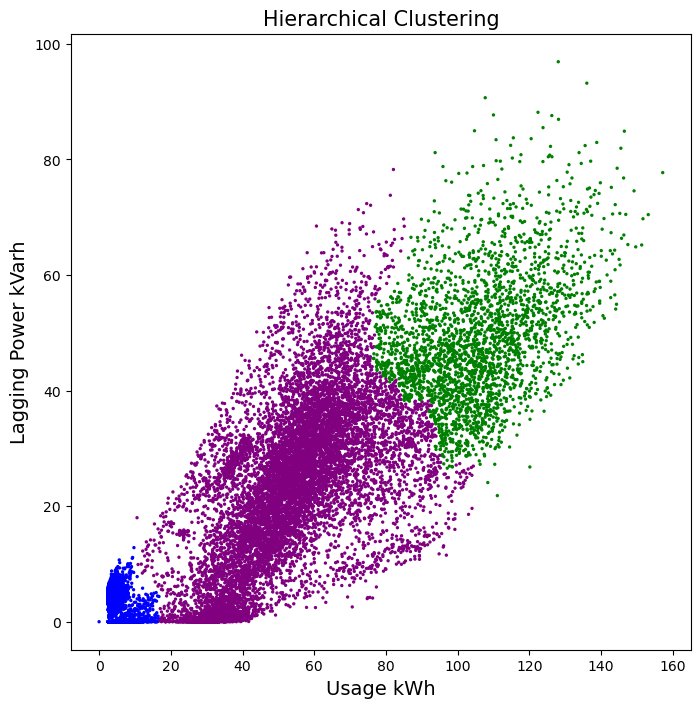

In [65]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','blue','green']

# Set the size of the figure
plt.figure(figsize = (8, 8))

# Use Scatter() function to plot columns with agglomertive clustering
plt.scatter(X_HC[:, 0], X_HC[:, 1], c = df['HR_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 2)
plt.title('Hierarchical Clustering',fontsize = 15)
plt.xlabel('Usage kWh', fontsize = 14)
plt.ylabel('Lagging Power kVarh', fontsize = 14)
plt.show()

## Fuzzy C-means clustering

In [107]:
X_FCM=df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh']].values

In [118]:
# Initialise an object fcm by calling a method FCM, podemos usar elbow method para saber cuantos clusters
fcmw = FCM(n_clusters = 3)

# fit the fuzzy-c-means
fcmw.fit(X_FCM)

# outputs are stored fcm_centers and fcm_labels
fcmw_centers = fcmw.centers

# argmax: Returns the indices of the maximum values along an axis.
fcmw_labels = fcmw.u.argmax(axis = 1)

In [119]:
fcmw_centers

array([[99.16377608, 45.29608298],
       [53.41373007, 24.57888659],
       [ 4.62715865,  3.15048757]])

Text(0.5, 1.0, 'Predicted')

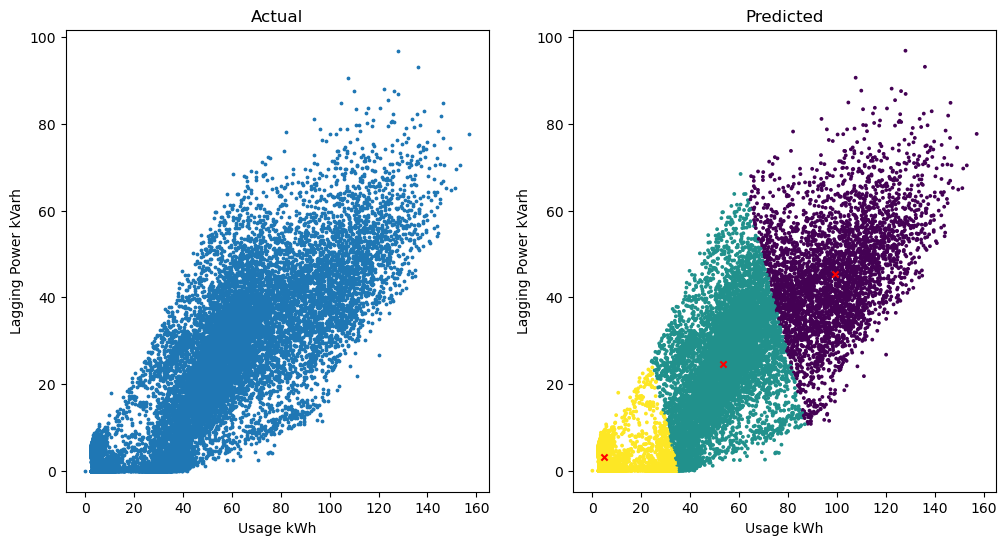

In [127]:
# plot result
f, axes = plt.subplots(1, 2, figsize = (12, 6))
axes[0].scatter(X_FCM[:,0], X_FCM[:,1],s = 3)
axes[1].scatter(X_FCM[:,0], X_FCM[:,1], c = fcmw_labels,s = 3)
axes[1].scatter(fcmw_centers[:,0], fcmw_centers[:,1], marker = "x",c='red', s = 20)

axes[0].set_xlabel('Usage kWh')
axes[0].set_ylabel('Lagging Power kVarh')
axes[1].set_xlabel('Usage kWh')
axes[1].set_ylabel('Lagging Power kVarh')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')


## References

Mullin, T. (2020). DBSCAN Parameter Estimation Using Python. [online] Medium. Available at: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd.

‌